# Homework exercises

**4<sup>th</sup> exercise notebook, covering the materials of the 7-8<sup>th</sup> classes.**  
Topics: tabular data, plotting and diagram visualization

Open and read the attached `airports.csv` file, containing information about (larger) airports all over the world.

The columns in each row are delimited with `;` characters (instead of the default `,`).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('airports.csv', delimiter=';')
display(df)

,iata,icao,name,runways,longest,elevation,country,region,city,lat,lon
0,ATL,KATL,Hartsfield - Jackson Atlanta International Air...,5,12390,1026,US,US-GA,Atlanta,33.636700,-84.428101
1,ANC,PANC,Anchorage Ted Stevens,3,12400,151,US,US-AK,Anchorage,61.174400,-149.996002
2,AUS,KAUS,Austin Bergstrom International Airport,2,12250,542,US,US-TX,Austin,30.194500,-97.669899
3,BNA,KBNA,Nashville International Airport,4,11030,599,US,US-TN,Nashville,36.124500,-86.678200
4,BOS,KBOS,Boston Logan,6,10083,19,US,US-MA,Boston,42.364300,-71.005203
...,...,...,...,...,...,...,...,...,...,...,...
3459,LNL,ZLLN,Cheng Xian Airport,1,9186,3707,CN,CN-62,Longnan,33.789722,105.788611
3460,XAI,ZHXY,Xinyang Minggang Airport,1,8858,4528,CN,CN-41,Xinyang,32.540556,114.078889
3461,YYA,ZGYY,Sanhe Airport,1,8530,230,CN,CN-43,Yueyang,29.312500,113.281667
3462,BQJ,UEBB,Batagay Airport,2,6562,699,RU,RU-SA,Batagay,67.647778,134.693611


---

## Exercise 1

Write a program that calculates and prints for each country the number of airports in that country. Sort the list by the number of airports.

In [2]:
df_count = df.groupby('country')['name'].count()
df_count_sorted = df_count.sort_values(ascending=False)
display(df_count_sorted)

country
US    583
CN    217
CA    205
AU    130
RU    126
     ... 
MS      1
FO      1
MQ      1
GD      1
KW      1
Name: name, Length: 231, dtype: int64

## Exercise 2

Write a program that calculates and prints which city has the highest elevation. If a city has multiple airports, calculate the average (mean)  elevation of the airports in that city.

In [3]:
df_elev = df.groupby('city')['elevation'].mean()
df_elev_sorted = df_elev.sort_values(ascending=False)
display(df_elev_sorted)

city
Daocheng            14472.0
Bangda              14219.0
Kangding            14042.0
Shiquanhe           14022.0
La Paz / El Alto    13355.0
                     ...   
Imperial              -54.0
Now Shahr             -61.0
Astrakhan             -65.0
Ramsar                -70.0
Atyrau                -72.0
Name: elevation, Length: 3322, dtype: float64

## Exercise 3

Write a program that displays the city names which has at least 5 runways accumulated. Sort the city list by the number of runways decreasing and also display the number of runway in each city.

In [5]:
df_run1 = df.groupby('city').sum()
df_run_sorted1 = df_run1.sort_values(by = 'runways',ascending=False)
display(df_run_sorted1[df_run_sorted1.runways > 5])

df_run = df.groupby('city')['runways'].sum()
df_run_sorted = df_run.sort_values(ascending=False)
display(df_run_sorted > 5) #displays boolean

,runways,longest,elevation,lat,lon
city,,,,,
Chicago,12,19522,1292,83.764599,-175.657204
Dallas,10,22201,1094,65.743900,-193.889801
London,9,54000,2090,300.919276,-81.884174
Houston,9,19603,142,59.629799,-190.620300
Denver,9,26002,11318,79.431797,-209.521996
Hamilton,8,26143,964,37.670898,30.718300
Beijing,8,34449,345,119.372067,349.383556
Orlando,8,21605,151,57.206999,-162.546501
Sydney,8,24713,253,-21.709099,242.117210


city
Chicago        True
Dallas         True
Denver         True
London         True
Houston        True
              ...  
Nantong       False
Nantes        False
Nanning       False
Nankoku       False
Londolovit    False
Name: runways, Length: 3322, dtype: bool

## Exercise 4

Create a *bar plot*, displaying length of the longest runway for each airport. The aiports shall be sorted by the longest runway length (ascending). Visualize only the top 100 aiports, so the diagram will be readable. Set an appropriate figure size, so all bars and labels are readable.

,iata,icao,name,runways,longest,elevation,country,region,city,lat,lon
2964,BPX,ZUBD,Qamdo Bangda Airport,1,18045,14219,CN,CN-54,Bangda,30.553600,97.108299
3324,ULY,UWLW,Ulyanovsk East Airport,1,16404,253,RU,RU-ULY,Ulyanovsk,54.401001,48.802700
3302,RKZ,ZURK,Shigatse Peace Airport,1,16404,12408,CN,CN-54,Xigaze,29.351944,89.310278
1702,UTN,FAUP,Pierre Van Ryneveld Airport,2,16076,2782,ZA,ZA-NC,Upington,-28.399099,21.260201
30,DEN,KDEN,Denver International Airport,6,16000,5433,US,US-CO,Denver,39.861698,-104.672997
...,...,...,...,...,...,...,...,...,...,...,...
135,MEX,MMMX,"Mexico City, Licenciado Benito Juarez Internat...",2,12966,7316,MX,MX-DIF,Mexico City,19.436300,-99.072098
946,LNK,KLNK,Lincoln Airport,3,12901,1219,US,US-NE,Lincoln,40.851002,-96.759201
1177,MHD,OIMM,Mashhad International Airport,2,12877,3263,IR,IR-30,Mashhad,36.235199,59.640999
108,MXP,LIMC,"Milan, Malpensa International Airport",2,12861,768,IT,IT-25,Milan,45.630600,8.728110


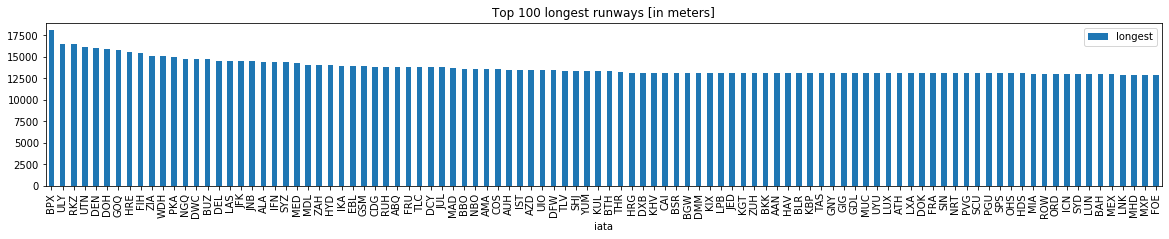

In [6]:
df_sort = df.sort_values(by = 'longest', ascending=False)
df_100 = df_sort.head(100)
display(df_100)

df_100.plot(kind = 'bar', x = 'iata', #iata is more readable but also could be x = 'name'
             y = 'longest',
            figsize = [20,3],
            title = 'Top 100 longest runways [in meters]')
plt.show()

## Exercise 5

Create a *bar plot*, displaying length of the longest runway for each **city**. The cities shall be sorted by the longest runway length (ascending). Visualize only the top 100 cities, so the diagram will be readable. Set an appropriate figure size, so all bars and labels are readable.

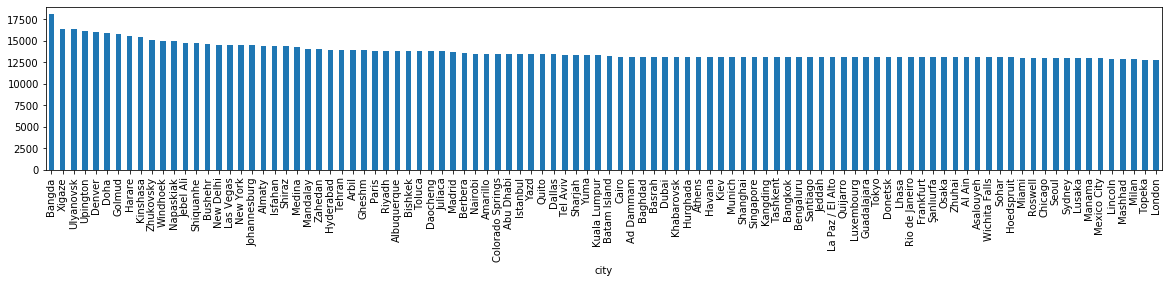

In [7]:
df_sort_city = df_sort.groupby('city')['longest'].max()
df_sort_city2 = df_sort_city.sort_values(ascending=False)
df_100_city = df_sort_city2.head(100)
#display(df_100_city)
df_100_city.columns = ['city', 'longest']

df_100_city.plot(kind = 'bar',
                 x = 'city',
                 y = 'longest',
                 figsize = [20,3])
plt.show()